In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
salary_data = pd.read_csv('salaries.csv')
salary_data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
x = salary_data.drop('salary_more_then_100k', axis=1)
y = salary_data['salary_more_then_100k']

In [4]:
le = LabelEncoder()

In [5]:
x['company'] = le.fit_transform(x['company'])
x['job'] = le.fit_transform(x['job'])
x['degree'] = le.fit_transform(x['degree'])
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [28]:
model = DecisionTreeClassifier(max_depth=3)

In [29]:
model.fit(x, y)

DecisionTreeClassifier(max_depth=3)

In [30]:
model.score(x, y)

0.9375

In [31]:
model.predict([[1,1,1]])

C:\Users\conta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [32]:
from sklearn import tree

In [33]:
print(tree.export_text(model))

|--- feature_0 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 1
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0



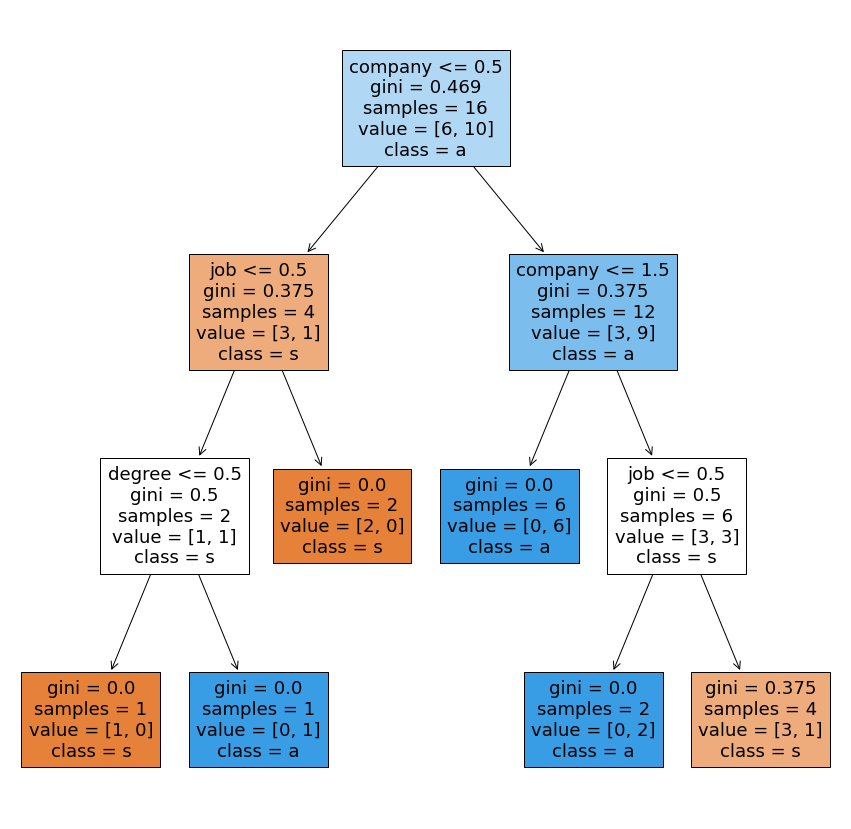

In [34]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=x.columns, class_names='salary_more_then_100k', filled = True)
plt.show()
# higher gini = better split

In [35]:
model2 = DecisionTreeClassifier()
model2.fit(x, y)
y_pred=model2.predict(x)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

1.0

In [41]:
y_pred=model.predict(x)

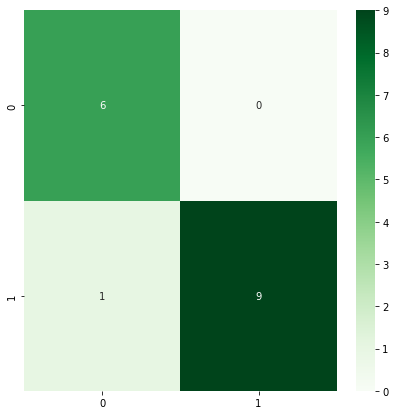

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y,y_pred)
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True,cmap='Greens')
plt.show()

In [43]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.90      0.95        10

    accuracy                           0.94        16
   macro avg       0.93      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



In [39]:
model.get_depth()

3